# **Data Toolkit**

#Question 1 : What is the difference between multithreading and multiprocessing?

* Multithreading - Running multiple threads (smaller units of a process) within the same process.
The threads share the same memory space
The process is easier, as all the threads share the same memory space. In python, threads are limites, only one thread runs python byte code at a time.

* Multiprocessing - Creating processess is heavier and slower
A crash in one process, does not affect others.And each process has its own python interpreter



In [36]:
import threading
import time

def say_hello(name):
    for i in range(3):
        print(f"Hello from {name}")
        time.sleep(1)

# Create two threads
t1 = threading.Thread(target=say_hello, args=("Thread-1",))
t2 = threading.Thread(target=say_hello, args=("Thread-2",))

t1.start()
t2.start()


t1.join()
t2.join()

print("Programme finished!")


Hello from Thread-1
Hello from Thread-2
Hello from Thread-1Hello from Thread-2

Hello from Thread-1Hello from Thread-2

Programme finished!


In [37]:
import multiprocessing
import time

def count_numbers(name):
    for i in range(5):
        print(f"{name} counts {i}")
        time.sleep(1)

if __name__ == "__main__":
    # Create two processes
    p1 = multiprocessing.Process(target=count_numbers, args=("Process-1",))
    p2 = multiprocessing.Process(target=count_numbers, args=("Process-2",))


    p1.start()
    p2.start()


    p1.join()
    p2.join()

    print("Processes finished!")


Process-1 counts 0
Process-2 counts 0
Process-1 counts 1
Process-2 counts 1
Process-1 counts 2
Process-2 counts 2
Process-1 counts 3
Process-2 counts 3
Process-1 counts 4
Process-2 counts 4
Processes finished!


# Question 2: What are the challenges associated with memory management in Python?

* Reference Counting - python uses reference counting to track back object usage.
* Circular References -  If two objects reference,  each other , then their reference count never reaches zero. This creates memory leaks. Unless the garbage collectorv removes them
* Fragmentation of memory - Python objects are stored in small blocks. With time frequent allocations and de-allocations can cause fragmenation, leading to ineffecient memory use
* Large Object Retention - Some objeccts like ; lists, dictionaries and NumPy arrays, can hold significant  memory even  after being cleared.. This delays garbage collection


# Question 3:Write a Python program that logs an error message to a log file when a division by zero exception occurs.


In [39]:
import logging

logging.basicConfig(
    filename='test_log.txt',
    level=logging.ERROR,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

try:

    num1 = int(input("Enter numerator: "))
    num2 = int(input("Enter denominator: "))
    result = num1 / num2
    print(f"Result: {result}")

except ZeroDivisionError as e:

    logging.error("Division by zero error occurred: %s", e)
    print("Error: Division by zero is not allowed. Check 'error_log.txt' for details.")


Enter numerator: 52
Enter denominator: 0


ERROR:root:Division by zero error occurred: division by zero


Error: Division by zero is not allowed. Check 'error_log.txt' for details.


#Question 4:Write a Python program that reads from one file and writes its content to


In [8]:
with open("File_1.txt", "w") as f: #first I created the file, from where it will read and write into another file
  f.write("Hello, My name is Priyanka, and I am a Data Analyst. This is my test file")
try:
  with open("File_1.txt", "r") as source_file :
    content = source_file.read()
  with open("File_2.txt", "w") as target_file:
    target_file.write(content)
  print("File copies Successfully!!!")

except FileNotFoundError as fe:
  print("Error : Source file not found", fe)
except PermissionError as pe:
  print("Error :You dont have permission to edit this file" , pe)






File copies Successfully!!!


# Question 5: Write a program that handles both IndexError and KeyError using a


In [11]:
try :
  num =  [10,20,30,40]
  dict_1 = {"Name": "Priyanka Saha", "Age": 26, "Course": "DA"}
  print("Access index value :", num[7])
  print("Access key value d",dict_1[f])
except (IndexError, KeyError) as e:
  print("Error:", e)
finally :
  print("Handeled both IndexError and KeyError successfully")


Error: list index out of range
Handeled both IndexError and KeyError successfully


# Question 6: What are the differences between NumPy arrays and Python lists?

Numpy Array -
* Is a data structure, provided by the NumPy library for numerical computation
* All elements in a NumPy are  homogeneous (are  ofthe same type)
* Also it is very fast,as it uses C- based programming. And C is  one of the fastest programming language after C++
* Its memory usage is less, as it stores data compactly
* It supports element wise operations
*  It  has built in mathematical operations - like, mean, median
* It  can represent multidimensional data (1D, 2D, 3D)

Python Lists-
* It  is a built-in  data  structure for storing, ordered items of any type
* It sstores heterogeneous data (of different type)
* It is slower in comparision, as it stores object seperately
* It has more memory
* It does not have direct mathematical operations
* It is usually 1D




In [12]:
# Example of NumPy Array
import numpy as np
arr = np.array([1,2,3,4])
print(arr + 10) # element wise addition


[11 12 13 14]


In [13]:
# Example of Python  list
lst = [1,2,3,4]
print(lst + [10]) # concatenatio, not addition

[1, 2, 3, 4, 10]


# Q7:Explain the difference between apply() and map() in Pandas.

apply() -
* It is used to apply a function along an axis(rows and columns) of a DataFrame or on a Series
* It is applicable to both DataFrame and Series
* It has axis parameters (axis = 0 for columns, axis = 1 for rows)
* Also  it is more flexible

map()-
* Used to apply a function element- wise on a Series
* It is applicable to only series objects
* It does not have axis- parameters
* It is slightly faster


In [15]:
# Example of map() on series
import pandas as pd
s = pd.Series([10,20,30,40])
print(s.map(lambda x : x**2))

0     100
1     400
2     900
3    1600
dtype: int64


In [17]:
# Example of apply() on DataFrame
df = pd.DataFrame({"A" : [1,2,3], "B" : [4,5,6]})
print(df.apply(lambda row : row["A"] + row["B"], axis= 1))


0    5
1    7
2    9
dtype: int64


# Question 8: Create a histogram using Seaborn to visualize a distribution

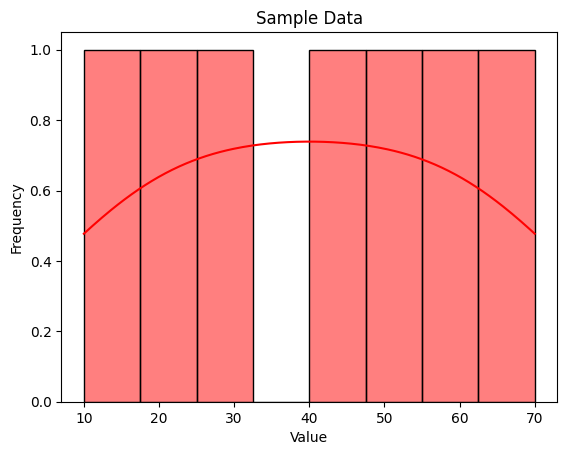

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

data = [10,20,30,40,50,60,70]
sns.histplot(data, bins = 8, kde = True, color = "Red")

plt.title("Sample Data", fontsize = 12)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Question 9: Use Pandas to load a CSV file and display its first 5 rows.

In [24]:
import pandas as pd
df = pd.read_csv("Data _Sheet.csv")
print("First 5 rows of the Data Sheet")
print(df.head())

First 5 rows of the Data Sheet
               Name Couse       ID  Placement Package / mo
0    Priyanka  Saha    DA  Pri@123  Confirmed     1,00,000
1  Annirudh  Sharma    DS  Ann@123  Confirmed       95,000
2         Niya Shah    DA  Niy@123  Confirmed       60,000
3     Ritesh Thakur    DS  Rit@123  Confirmed       45,000
4       Parth Mehta    DS  Par@123  Confirmed       78,000


# Question 10: Calculate the correlation matrix using Seaborn and visualize it with a heatmap.


Correlation Matrix :
            Experience       Age    Salary
Experience    1.000000  0.995871 -0.882498
Age           0.995871  1.000000 -0.921551
Salary       -0.882498 -0.921551  1.000000


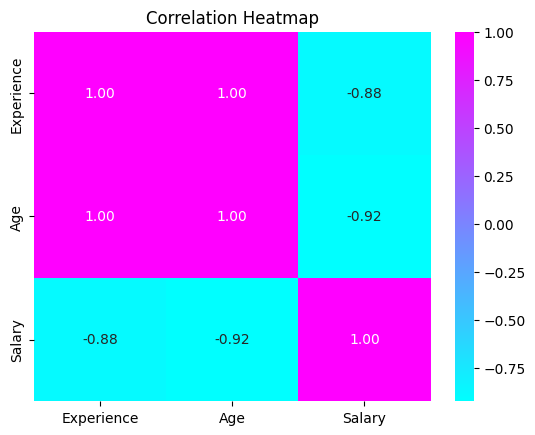

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data1 = {
    "Experience" : [5, 7, 4],
    "Age" : [26, 29, 25],
    "Salary" : [50000, 20000, 45000]
}

df = pd.DataFrame(data1)
corr_matrix = df.corr()
print("Correlation Matrix :")
print(corr_matrix)
sns.heatmap(corr_matrix, annot = True, cmap= "cool", fmt = ".2f")

plt.title("Correlation Heatmap", fontsize = 12)
plt.show()